# import modules

In [1]:
import pandas as pd
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score

In [3]:
data=pd.read_csv(r"C:\Users\SREEKUTTY\Downloads\crop_recommendation_dataset.csv")
data

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.3000,79.50000,94.4400,0.63,Loamy Soil,rice
1,21.770462,80.319644,226.655537,7.038096,72.0200,141.82400,141.6978,1.40,Loamy Soil,rice
2,23.004459,82.320763,263.964248,7.633568,77.7700,59.39000,81.8900,1.80,Peaty Soil,rice
3,26.491096,80.283629,242.864034,6.980401,78.6500,147.45895,142.9430,1.43,Loamy Soil,rice
4,20.280071,81.604873,262.717340,7.628473,73.9800,68.95000,95.7400,1.75,Peaty Soil,rice
...,...,...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,58.286977,6.765095,57.3400,144.48000,73.0800,1.64,Neutral Soil,watermelon
3096,26.638386,84.695469,48.324286,6.189214,56.0600,61.34000,47.9500,1.35,Peaty Soil,watermelon
3097,25.331045,84.305338,41.532187,6.904242,54.9395,145.53795,97.8300,1.58,Neutral Soil,watermelon
3098,26.820601,83.892415,43.971937,6.463271,55.5100,76.89000,50.9200,0.68,Acidic Soil,watermelon


In [5]:
print(data.to_string())

      Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous   Potassium  Carbon           Soil          Crop
0       20.879744  82.002744  202.935536  6.502985   69.3000    79.500000   94.440000    0.63     Loamy Soil          rice
1       21.770462  80.319644  226.655537  7.038096   72.0200   141.824000  141.697800    1.40     Loamy Soil          rice
2       23.004459  82.320763  263.964248  7.633568   77.7700    59.390000   81.890000    1.80     Peaty Soil          rice
3       26.491096  80.283629  242.864034  6.980401   78.6500   147.458950  142.943000    1.43     Loamy Soil          rice
4       20.280071  81.604873  262.717340  7.628473   73.9800    68.950000   95.740000    1.75     Peaty Soil          rice
5       23.058049  83.370118  251.055000  7.073454   76.8100   140.936730  140.607680    0.86     Loamy Soil          rice
6       22.708838  82.639414  271.324860  5.700806   78.2900    49.080000   67.850000    1.78     Peaty Soil          rice
7       20.28007

# Performing Exploratory Data Analysis(EDA)

In [8]:
data.shape

(3100, 10)

In [10]:
data.isna().sum()

Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Humidity     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.3+ KB


In [14]:
data.describe()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.105071,66.005004,110.212026,6.368656,61.236056,70.195388,69.553449,1.478071
std,7.545380,23.996884,63.894459,0.801479,8.391950,34.897833,29.464613,0.577143
min,9.944995,10.199589,20.757078,3.686162,50.580000,32.896500,41.841500,0.500000
25%,22.810495,55.366047,64.997024,5.896095,55.395000,45.255000,50.760000,0.980000
50%,26.087226,68.918967,97.057093,6.342518,59.265000,57.640000,56.895000,1.470000
75%,29.343867,84.446524,141.210784,6.839783,64.962500,82.212500,73.592500,1.980000
max,54.779935,99.646348,385.086491,9.407343,96.197500,149.099313,149.224250,2.500000


In [16]:
data.head(11)

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.30,79.50000,94.44000,0.63,Loamy Soil,rice
1,21.770462,80.319644,226.655537,7.038096,72.02,141.82400,141.69780,1.40,Loamy Soil,rice
2,23.004459,82.320763,263.964248,7.633568,77.77,59.39000,81.89000,1.80,Peaty Soil,rice
3,26.491096,80.283629,242.864034,6.980401,78.65,147.45895,142.94300,1.43,Loamy Soil,rice
4,20.280071,81.604873,262.717340,7.628473,73.98,68.95000,95.74000,1.75,Peaty Soil,rice
5,23.058049,83.370118,251.055000,7.073454,76.81,140.93673,140.60768,0.86,Loamy Soil,rice
6,22.708838,82.639414,271.324860,5.700806,78.29,49.08000,67.85000,1.78,Peaty Soil,rice
7,20.280071,82.894086,241.974195,5.718627,72.60,49.41000,65.18000,2.32,Peaty Soil,rice
8,24.515881,83.535216,230.446236,6.685346,76.22,109.64000,137.65000,2.34,Loamy Soil,rice
9,23.223974,83.033227,221.209196,6.336254,73.70,67.53000,84.44000,2.37,Peaty Soil,rice


# Pie chart

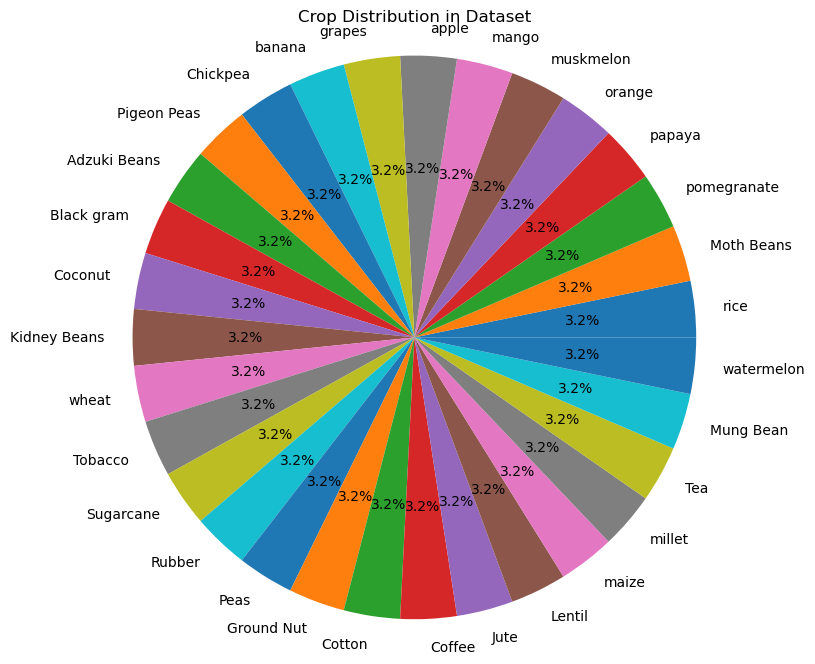

In [19]:
crop_counts = data['Crop'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%')
plt.title('Crop Distribution in Dataset')
plt.axis('equal')  # Keeps the pie chart circular
# plt.tight_layout()
plt.show()

# Bar Plot

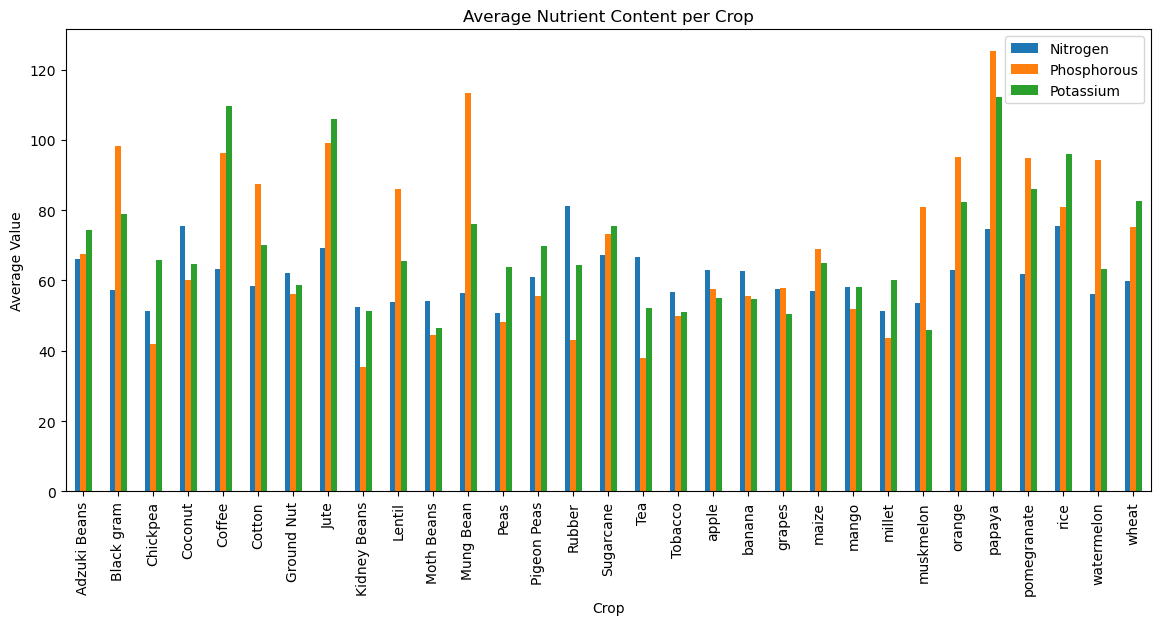

In [22]:
avg_nutrients = data.groupby('Crop')[['Nitrogen', 'Phosphorous', 'Potassium']].mean().reset_index()
avg_nutrients.plot(x='Crop', kind='bar', figsize=(14,6))
plt.title('Average Nutrient Content per Crop')
plt.xticks(rotation=90)
plt.ylabel('Average Value')
plt.show()

C:\Users\SREEKUTTY\AppData\Local\Temp\ipykernel_21828\951267793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acidic_crop_counts.index, y=acidic_crop_counts.values, palette='coolwarm')


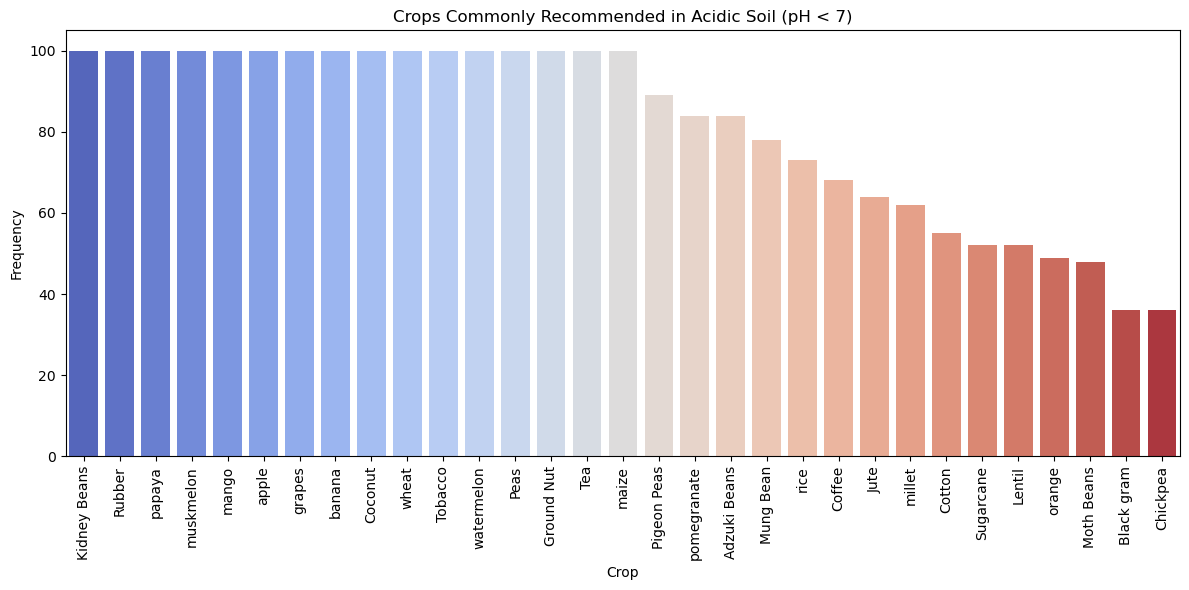

In [23]:
acidic_soil_data = data[data['PH'] < 7]
acidic_crop_counts = acidic_soil_data['Crop'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=acidic_crop_counts.index, y=acidic_crop_counts.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Crops Commonly Recommended in Acidic Soil (pH < 7)')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram

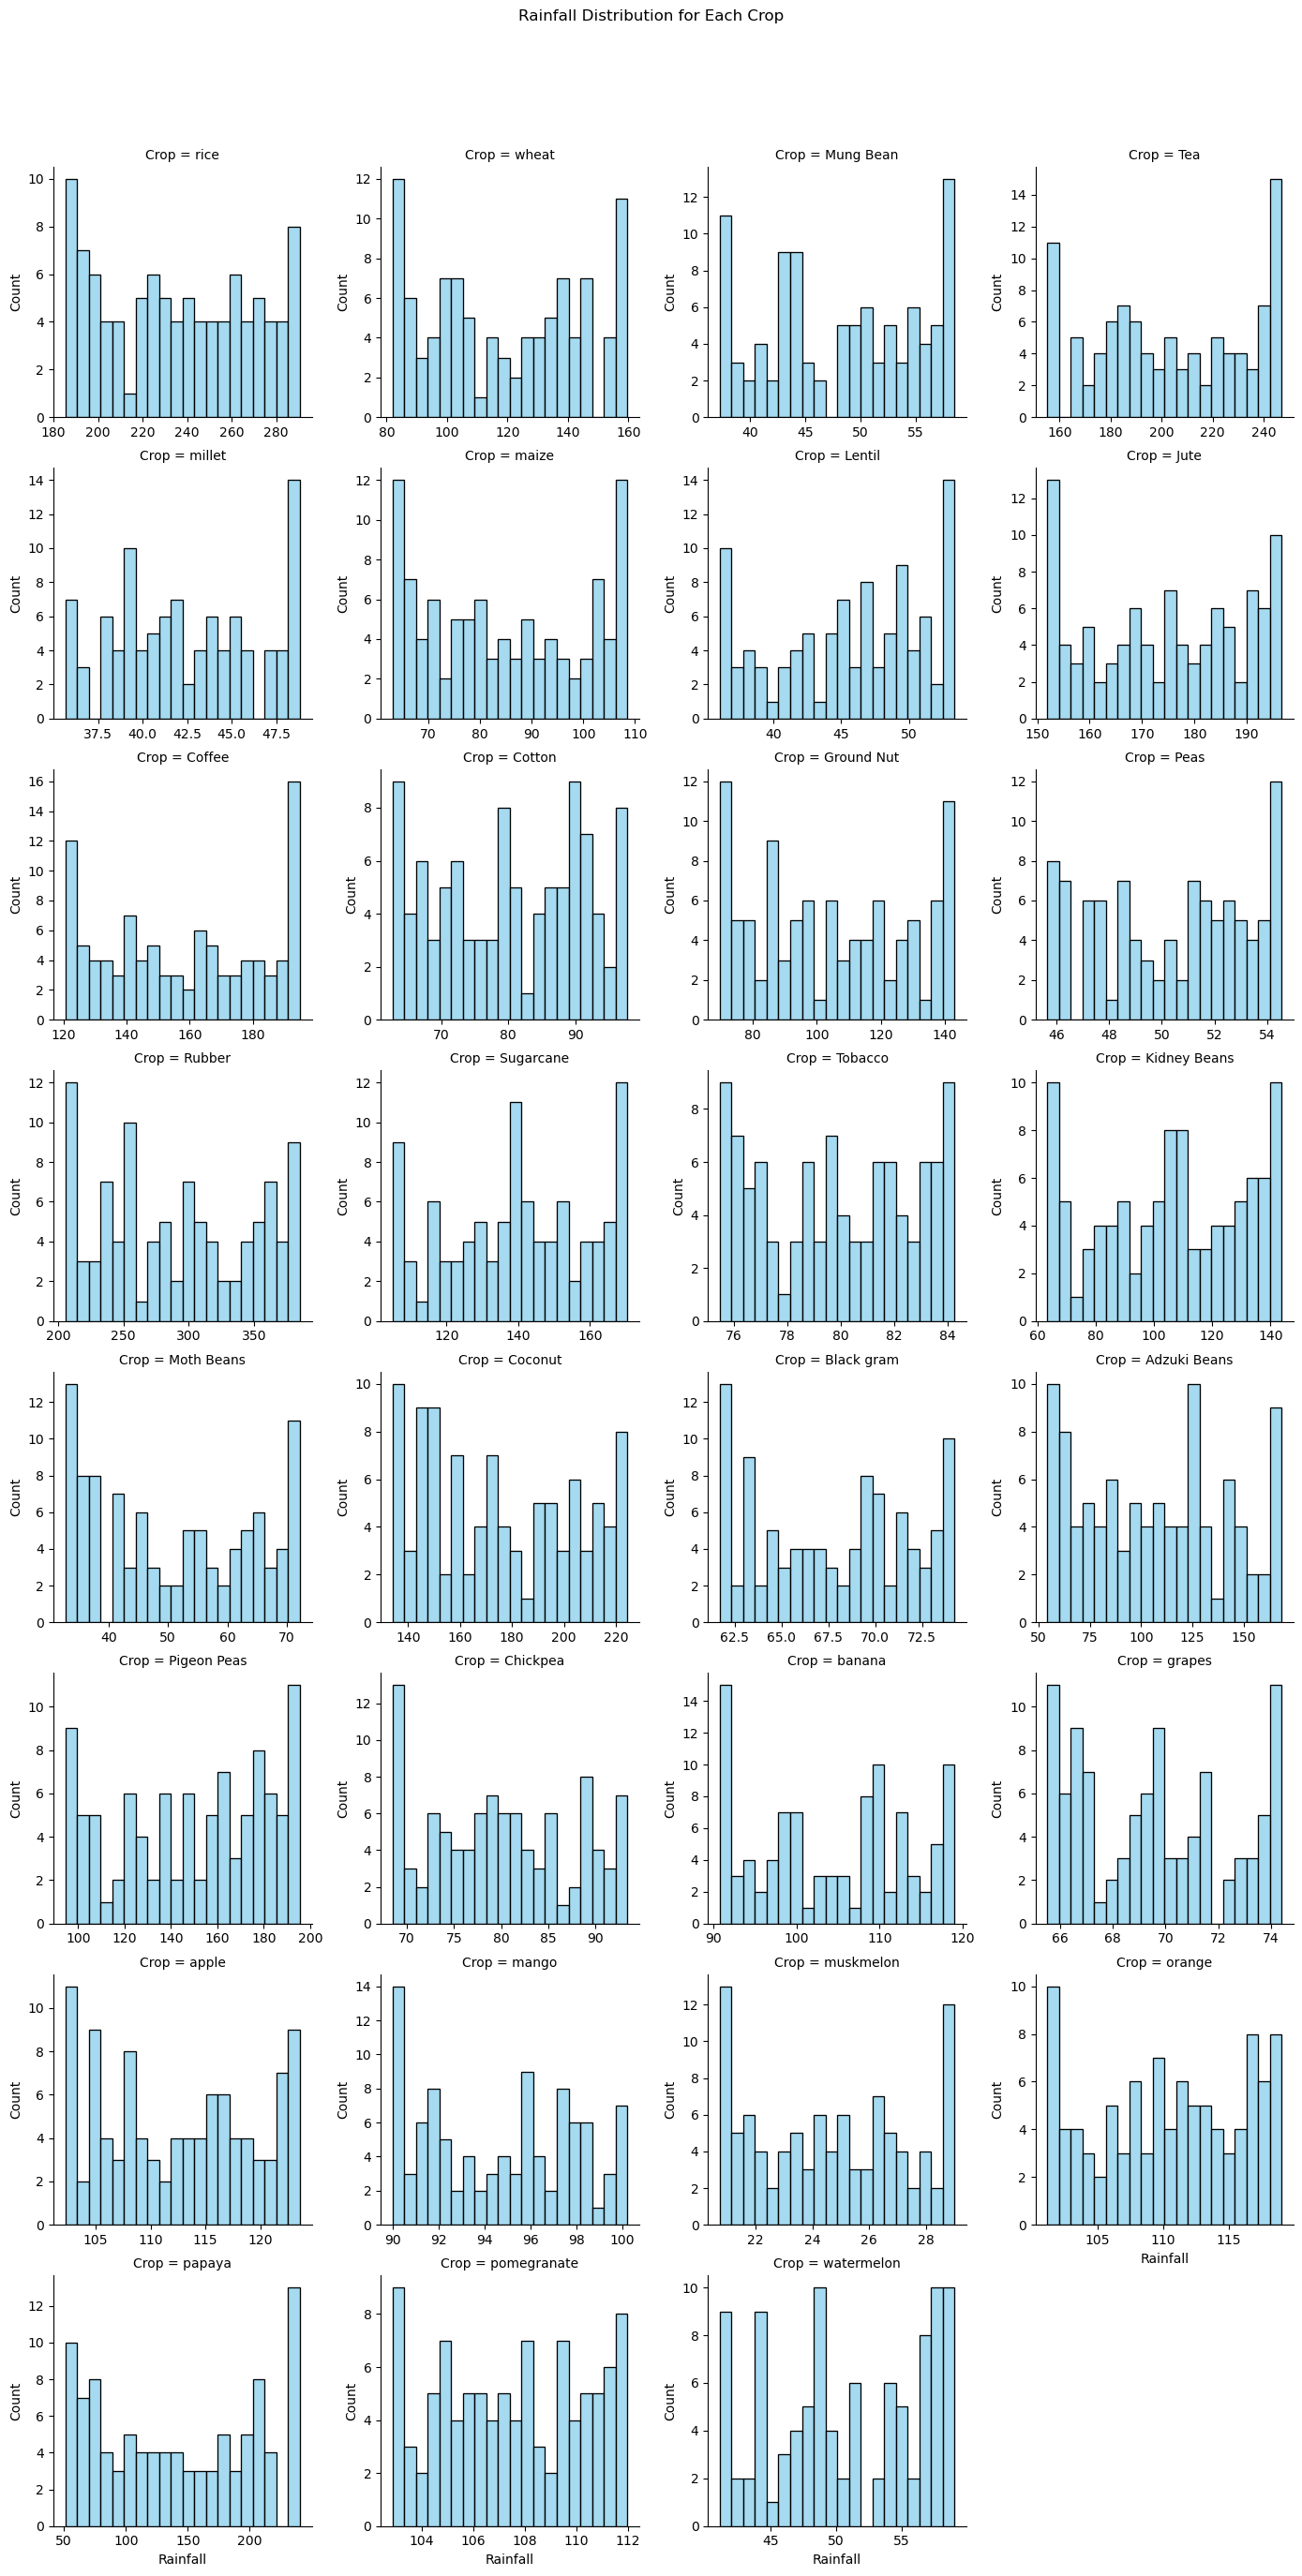

In [31]:
g = sns.FacetGrid(data, col='Crop', col_wrap=4, height=3.5, sharex=False, sharey=False)
g.map(sns.histplot, 'Rainfall', bins=20, color='skyblue')
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Rainfall Distribution for Each Crop')
plt.show()

# Heat Map

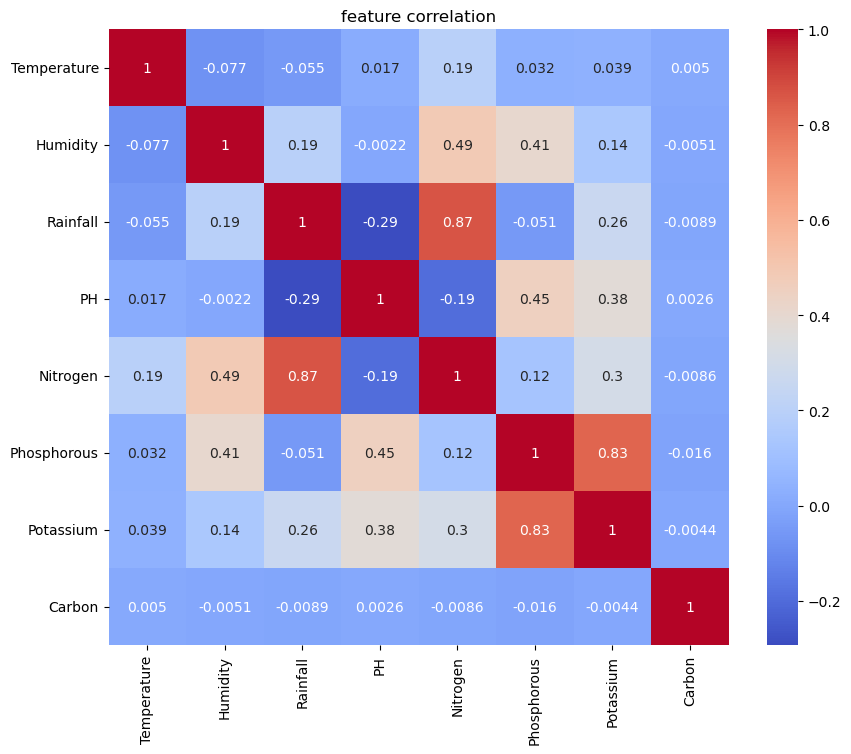

In [30]:
plt.figure(figsize=(10,8))
numeric_data=data.select_dtypes(include=["float64","int64"])
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("feature correlation")
plt.show()

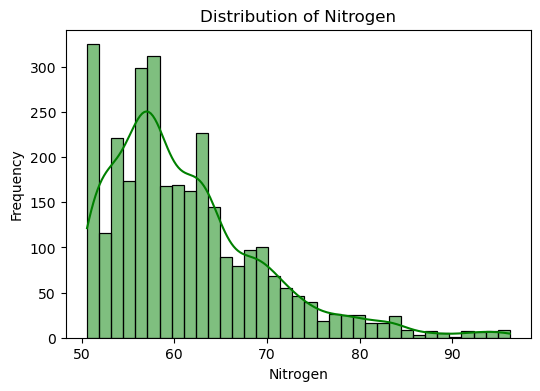

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Nitrogen'], kde=True, color='green')
plt.title("Distribution of Nitrogen")
plt.xlabel("Nitrogen")
plt.ylabel("Frequency")
plt.show()

In [36]:
data["Crop"].value_counts()

Crop
rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: count, dtype: int64

In [38]:
data["Soil"].value_counts()

Soil
Acidic Soil      1519
Peaty Soil        537
Neutral Soil      510
Loamy Soil        489
Alkaline Soil      45
Name: count, dtype: int64

In [40]:
data["Crop"].nunique()

31

# Encoding Categorical Values

In [43]:
obj=LabelEncoder()

In [45]:
data["Soil"]=obj.fit_transform(data["Soil"])

In [47]:
data.head()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.30,79.50000,94.4400,0.63,2,rice
1,21.770462,80.319644,226.655537,7.038096,72.02,141.82400,141.6978,1.40,2,rice
2,23.004459,82.320763,263.964248,7.633568,77.77,59.39000,81.8900,1.80,4,rice
3,26.491096,80.283629,242.864034,6.980401,78.65,147.45895,142.9430,1.43,2,rice
4,20.280071,81.604873,262.717340,7.628473,73.98,68.95000,95.7400,1.75,4,rice


# scaling all numeric value

In [50]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data[["Temperature","Humidity","Rainfall","PH","Nitrogen","Phosphorous","Potassium","Carbon","Soil"]])

In [52]:
x_scaled=data.drop("Crop",axis=1)
y=data["Crop"]


# Splitting the Dataset into Train and Test

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [57]:
xtrain

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil
1026,33.844584,58.030605,117.645623,6.456020,62.84,62.000,68.840000,0.87,0
1723,27.638349,95.487634,205.546311,5.859719,80.14,55.120,64.030000,1.72,4
2438,22.445170,94.678711,107.184327,5.617227,62.66,50.550,50.340000,1.24,0
2114,18.197370,14.710705,70.181852,6.576416,51.04,40.420,62.090000,1.55,2
1737,25.392411,98.089512,218.080385,5.579845,80.18,50.720,60.470000,2.09,0
...,...,...,...,...,...,...,...,...,...
2763,13.703192,90.955894,106.294488,7.609348,57.36,74.780,63.260000,1.62,4
905,24.694571,81.735888,78.584944,6.628723,58.81,96.040,68.220000,0.82,2
1096,30.346443,74.295065,69.706537,6.357918,57.90,64.820,53.070000,1.81,0
235,29.245990,84.800841,53.432289,6.991242,57.36,148.589,144.764698,0.61,3


# Random forest classifier

In [60]:
model_RF=RandomForestClassifier(n_estimators=10)

In [62]:
model_RF.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

# model evaluation

In [65]:
xtrain_pred=model_RF.predict(xtrain)
train_accuracy=accuracy_score(xtrain_pred,ytrain)
train_accuracy

0.9967741935483871

In [67]:
xtest_pred=model_RF.predict(xtest)
test_accuracy=accuracy_score(xtest_pred,ytest)
test_accuracy

0.9403225806451613

In [69]:
cm=confusion_matrix(ytest,xtest_pred)
cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

In [71]:
cr=classification_report(ytest,xtest_pred)
# cr
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
 A d z u k i   B e a n s               1 . 0 0             1 . 0 0             1 . 0 0                 2 1 
     B l a c k   g r a m               0 . 9 6             1 . 0 0             0 . 9 8                 2 3 
         C h i c k p e a               1 . 0 0             1 . 0 0             1 . 0 0                 2 3 
           C o c o n u t               1 . 0 0             1 . 0 0             1 . 0 0                 1 6 
             C o f f e e               0 . 8 8             0 . 8 8             0 . 8 8                 1 7 
             C o t t o n               1 . 0 0             1 . 0 0             1 . 0 0                 2 0 
     G r o u n d   N u t               0 . 9 0             1 . 0 0             0 . 9 5                 1 8 
                 J u t e               0 . 7 8             0 . 9 6             0 . 8 6                 2 6 
 K i d n e y   B e a n s   

In [73]:
ypred=model_RF.predict(xtest)
ypred

array(['Jute', 'Sugarcane', 'banana', 'papaya', 'rice', 'Chickpea',
       'Kidney Beans', 'Cotton', 'Tea', 'Rubber', 'banana', 'muskmelon',
       'Jute', 'orange', 'papaya', 'Jute', 'muskmelon', 'Tea',
       'Adzuki Beans', 'Kidney Beans', 'rice', 'Tea', 'Cotton', 'Rubber',
       'Adzuki Beans', 'Coffee', 'watermelon', 'Black gram',
       'Adzuki Beans', 'muskmelon', 'pomegranate', 'Coffee', 'millet',
       'Moth Beans', 'wheat', 'rice', 'Coffee', 'orange', 'Kidney Beans',
       'Mung Bean', 'Cotton', 'Lentil', 'millet', 'watermelon',
       'Sugarcane', 'Kidney Beans', 'watermelon', 'millet', 'millet',
       'Ground Nut', 'Rubber', 'Coffee', 'Jute', 'apple', 'Kidney Beans',
       'Cotton', 'Ground Nut', 'Adzuki Beans', 'papaya', 'Adzuki Beans',
       'mango', 'grapes', 'Coffee', 'Black gram', 'Mung Bean', 'Cotton',
       'Mung Bean', 'rice', 'Tobacco', 'Moth Beans', 'Kidney Beans',
       'Peas', 'Moth Beans', 'Mung Bean', 'rice', 'wheat', 'Tea',
       'Mung Bean', 'Moth B

In [75]:
print("Random Forest Classifier")
Accuracy=accuracy_score(ytest,ypred)
print("Accuracy:",Accuracy)

precision=precision_score(ytest,ypred,average="macro")
print("Precision:",precision)

recall=recall_score(ytest,ypred,average="macro")
print("Recall:",recall)

f1=f1_score(ytest,ypred,average="macro")
print("F1_score:",f1)

Random Forest Classifier
Accuracy: 0.9403225806451613
Precision: 0.9436526046552306
Recall: 0.942512562651165
F1_score: 0.9412506284726486


# Decision tree classifier

In [78]:
model_DT=DecisionTreeClassifier()

In [80]:
model_DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

# model evaluation

In [83]:
xtrain_pred=model_DT.predict(xtrain)
train_accuracy=accuracy_score(xtrain_pred,ytrain)
train_accuracy

1.0

In [85]:
xtest_pred=model_RF.predict(xtest)
test_accuracy=accuracy_score(xtest_pred,ytest)
test_accuracy

0.9403225806451613

In [87]:
cm=confusion_matrix(ytest,xtest_pred)
cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

In [89]:
cr=classification_report(ytest,xtest_pred)
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
 A d z u k i   B e a n s               1 . 0 0             1 . 0 0             1 . 0 0                 2 1 
     B l a c k   g r a m               0 . 9 6             1 . 0 0             0 . 9 8                 2 3 
         C h i c k p e a               1 . 0 0             1 . 0 0             1 . 0 0                 2 3 
           C o c o n u t               1 . 0 0             1 . 0 0             1 . 0 0                 1 6 
             C o f f e e               0 . 8 8             0 . 8 8             0 . 8 8                 1 7 
             C o t t o n               1 . 0 0             1 . 0 0             1 . 0 0                 2 0 
     G r o u n d   N u t               0 . 9 0             1 . 0 0             0 . 9 5                 1 8 
                 J u t e               0 . 7 8             0 . 9 6             0 . 8 6                 2 6 
 K i d n e y   B e a n s   

In [91]:
ypred=model_DT.predict(xtest)
ypred

array(['Jute', 'Sugarcane', 'banana', 'papaya', 'rice', 'Chickpea',
       'Kidney Beans', 'Cotton', 'Tea', 'Rubber', 'banana', 'muskmelon',
       'Jute', 'orange', 'papaya', 'Jute', 'muskmelon', 'Tea',
       'Adzuki Beans', 'Kidney Beans', 'rice', 'Tea', 'Cotton', 'Rubber',
       'Adzuki Beans', 'Coffee', 'watermelon', 'Black gram',
       'Adzuki Beans', 'muskmelon', 'pomegranate', 'Coffee', 'millet',
       'Moth Beans', 'wheat', 'rice', 'Coffee', 'orange', 'Kidney Beans',
       'Mung Bean', 'Cotton', 'Lentil', 'millet', 'watermelon',
       'Sugarcane', 'Kidney Beans', 'watermelon', 'millet', 'millet',
       'Ground Nut', 'Rubber', 'Coffee', 'Jute', 'apple', 'Kidney Beans',
       'Cotton', 'Ground Nut', 'Adzuki Beans', 'papaya', 'Adzuki Beans',
       'mango', 'grapes', 'Coffee', 'Black gram', 'Mung Bean', 'Cotton',
       'Mung Bean', 'Rubber', 'maize', 'Moth Beans', 'Kidney Beans',
       'Peas', 'wheat', 'Mung Bean', 'rice', 'wheat', 'Tea', 'Mung Bean',
       'Moth Beans'

In [93]:
print("DecisionTreeClassifier")
Accuracy=accuracy_score(ytest,ypred)
print("Accuracy:",Accuracy)

precision=precision_score(ytest,ypred,average="macro")
print("Precision:",precision)

recall=recall_score(ytest,ypred,average="macro")
print("Recall:",recall)

f1=f1_score(ytest,ypred,average="macro")
print("F1_score:",f1)

DecisionTreeClassifier
Accuracy: 0.9354838709677419
Precision: 0.941583326909854
Recall: 0.9371057665670323
F1_score: 0.9370722699218129


# Logitic Regression

In [96]:
model_LR=LogisticRegression()

In [98]:
model_LR.fit(xtrain,ytrain)

C:\Users\SREEKUTTY\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model evaluation

In [101]:
xtrain_pred=model_LR.predict(xtrain)
train_accuracy=accuracy_score(xtrain_pred,ytrain)
train_accuracy

0.7266129032258064

In [103]:
xtest_pred=model_LR.predict(xtest)
test_accuracy=accuracy_score(xtest_pred,ytest)
test_accuracy

0.7048387096774194

In [105]:
cm=confusion_matrix(ytest,xtest_pred)
cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  

In [107]:
cr=classification_report(ytest,xtest_pred)
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
 A d z u k i   B e a n s               1 . 0 0             1 . 0 0             1 . 0 0                 2 1 
     B l a c k   g r a m               0 . 9 6             0 . 9 6             0 . 9 6                 2 3 
         C h i c k p e a               0 . 9 6             0 . 9 6             0 . 9 6                 2 3 
           C o c o n u t               0 . 6 8             0 . 9 4             0 . 7 9                 1 6 
             C o f f e e               0 . 4 0             0 . 4 7             0 . 4 3                 1 7 
             C o t t o n               0 . 6 7             0 . 7 0             0 . 6 8                 2 0 
     G r o u n d   N u t               0 . 6 5             0 . 7 2             0 . 6 8                 1 8 
                 J u t e               0 . 7 0             0 . 7 3             0 . 7 2                 2 6 
 K i d n e y   B e a n s   

In [109]:
ypred=model_LR.predict(xtest)
ypred

array(['Jute', 'Sugarcane', 'papaya', 'Cotton', 'Coconut', 'Chickpea',
       'Kidney Beans', 'pomegranate', 'Tea', 'Rubber', 'banana',
       'muskmelon', 'Jute', 'apple', 'Mung Bean', 'Jute', 'muskmelon',
       'Tea', 'Adzuki Beans', 'Kidney Beans', 'rice', 'Rubber', 'Cotton',
       'Tea', 'Adzuki Beans', 'Coffee', 'watermelon', 'Black gram',
       'Adzuki Beans', 'muskmelon', 'apple', 'Coffee', 'millet',
       'Moth Beans', 'wheat', 'rice', 'Coffee', 'papaya', 'Kidney Beans',
       'Mung Bean', 'Cotton', 'Lentil', 'millet', 'grapes', 'banana',
       'Kidney Beans', 'watermelon', 'millet', 'millet', 'Ground Nut',
       'Rubber', 'Coffee', 'Jute', 'apple', 'Kidney Beans', 'grapes',
       'Ground Nut', 'Adzuki Beans', 'Cotton', 'Adzuki Beans', 'mango',
       'grapes', 'Coffee', 'Black gram', 'watermelon', 'Cotton',
       'Mung Bean', 'Jute', 'maize', 'Moth Beans', 'Kidney Beans', 'Peas',
       'Moth Beans', 'Mung Bean', 'rice', 'Pigeon Peas', 'Rubber',
       'Mung Bean', 'M

In [111]:
print("LogisticRegression")
Accuracy=accuracy_score(ytest,ypred)
print("Accuracy:",Accuracy)

precision=precision_score(ytest,ypred,average="macro")
print("Precision:",precision)

recall=recall_score(ytest,ypred,average="macro")
print("Recall:",recall)

f1=f1_score(ytest,ypred,average="macro")
print("F1_score:",f1)

LogisticRegression
Accuracy: 0.7048387096774194
Precision: 0.6873253562309608
Recall: 0.7082797054488746
F1_score: 0.6892816314147332


# confusion matrix

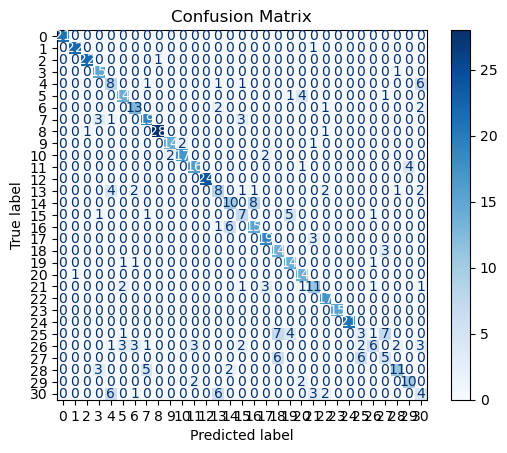

In [114]:
cm=confusion_matrix(ytest,xtest_pred)
cm
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

# Making a prediction system

In [117]:
# Full input: [Temp, Humidity, Rainfall, pH, N, P, K, Carbon, Soil]
input_data = [26.0, 75.0, 180.0, 6.7, 60, 45, 55, 1.1,12]
input_array = np.array(input_data).reshape(1, -1)

In [119]:
# Predict
predicted_crop = model_RF.predict(input_array)[0]

print(f"🌱 Recommended crop for the given conditions is:{predicted_crop}")

🌱 Recommended crop for the given conditions is:Sugarcane


C:\Users\SREEKUTTY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# save to pickle

In [122]:
import pickle
filename="ML PROJECT.ipynb"
pickle.dump(model_RF,open(filename,"wb"))

In [124]:
# loading the saved model
loaded_model=pickle.load(open(filename,"rb"))
loaded_model

RandomForestClassifier(n_estimators=10)

# predicting again using pickle file

In [127]:
input_data = [26.0, 75.0, 180.0, 6.7, 60, 45, 55, 1.1,12]
input_array = np.array(input_data).reshape(1, -1)
predicted_crop =loaded_model.predict(input_array)[0]

print(f"🌱 Recommended crop for the given conditions is: {predicted_crop}")

🌱 Recommended crop for the given conditions is: Sugarcane


C:\Users\SREEKUTTY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [129]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


# User Interface

In [132]:
import gradio as gr
import pickle
import numpy as np

#load the yrained model
model = pickle.load(open(r"C:\Users\SREEKUTTY\crop_model.pkl", "rb"))

# Define a prediction function
def predict_crop(Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil):
    try: 
       input_data = np.array([Temperature, Humidity, Rainfall, PH, Nitrogen, Phosphorous, Potassium, Carbon, Soil]).reshape(1, -1)
       print("Input received:", input_data)
       predicted_crop = model.predict(input_data)[0]
       print("Prediction:", predicted_crop)
       return f"🌱 Recommended crop : {predicted_crop}"
    except Exception as e:
       return f"⚠️ Error occurred: {str(e)}"

    


# Create a Gradio interface
iface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Temperature"),
        gr.Number(label="Humidity"),
        gr.Number(label="Rainfall"),
        gr.Number(label="PH"),
        gr.Number(label="Nitrogen"),
        gr.Number(label="Phosphorous"),
        gr.Number(label="Potassium"),
        gr.Number(label="Carbon"),
        gr.Dropdown(label="Soil"),
     ],
    outputs="text",
    title="Crop recommendation for Farmers",
    description="Enter the parameter to predict crop ."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
